# Pima Indian Diabetes Prediction

In [46]:
import numpy as np
import pandas as pd                 # pandas is a dataframe library
import matplotlib.pyplot as plt      # matplotlib.pyplot plots data
import seaborn as sns                #ploting library

from sklearn import metrics
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
# to allow us have plots in line
%matplotlib inline                  

## Loading and Preparing the Data

In [2]:
df = pd.read_csv("E:/education/Industrial MS/health/projects/data/diabet/exercise_files/07/demos/demos/data/pima-data.csv")

In [3]:
df.shape

(768, 10)

In [4]:
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [5]:
df.tail(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
763,10,101,76,48,180,32.9,0.171,63,1.8912,False
764,2,122,70,27,0,36.8,0.340,27,1.0638,False
765,5,121,72,23,112,26.2,0.245,30,0.9062,False
766,1,126,60,0,0,30.1,0.349,47,0.0000,True
767,1,93,70,31,0,30.4,0.315,23,1.2214,False


In [6]:
print("# rows in dataframe {0}".format(len(df)))
print("# rows missing glucose_conc: {0}".format(len(df.loc[df['glucose_conc'] == 0])))
print("# rows missing diastolic_bp: {0}".format(len(df.loc[df['diastolic_bp'] == 0])))
print("# rows missing thickness: {0}".format(len(df.loc[df['thickness'] == 0])))
print("# rows missing insulin: {0}".format(len(df.loc[df['insulin'] == 0])))
print("# rows missing bmi: {0}".format(len(df.loc[df['bmi'] == 0])))
print("# rows missing diab_pred: {0}".format(len(df.loc[df['diab_pred'] == 0])))
print("# rows missing age: {0}".format(len(df.loc[df['age'] == 0])))

# rows in dataframe 768
# rows missing glucose_conc: 5
# rows missing diastolic_bp: 35
# rows missing thickness: 227
# rows missing insulin: 374
# rows missing bmi: 11
# rows missing diab_pred: 0
# rows missing age: 0


In [7]:
df.replace(0,df.mean(axis=0),inplace=True)

In [8]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6.000000,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1.379000,True
1,1.000000,85.0,66.0,29.000000,79.799479,26.6,0.351,31,1.142600,False
2,8.000000,183.0,64.0,20.536458,79.799479,23.3,0.672,32,0.809136,True
3,1.000000,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0.906200,False
4,3.845052,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1.379000,True


In [9]:
df.dtypes

num_preg        float64
glucose_conc    float64
diastolic_bp    float64
thickness       float64
insulin         float64
bmi             float64
diab_pred       float64
age               int64
skin            float64
diabetes           bool
dtype: object

In [10]:
df.head()
diabetes_map = {True : 1, False : 0}
df['diabetes'] = df['diabetes'].map(diabetes_map)

In [11]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6.000000,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1.379000,1
1,1.000000,85.0,66.0,29.000000,79.799479,26.6,0.351,31,1.142600,0
2,8.000000,183.0,64.0,20.536458,79.799479,23.3,0.672,32,0.809136,1
3,1.000000,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0.906200,0
4,3.845052,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1.379000,1


## Check for null values

In [12]:
df.isnull().values.any()


False

### Correlated Feature Check

Text(0.5, 1.0, 'Correlation Heatmap')

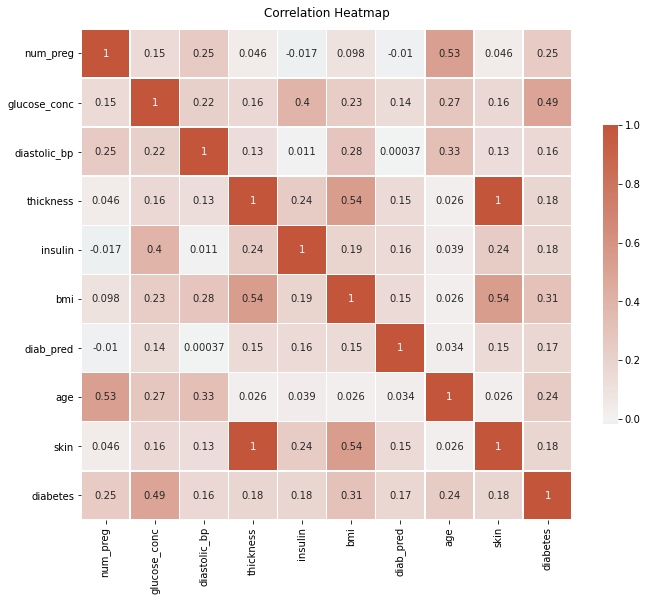

In [13]:
size = 11
fig, ax = plt.subplots(figsize=(size, size))
corr = df.corr()    # data frame correlation function
cmap = sns.diverging_palette(230, 20, as_cmap=True)
heatmap = sns.heatmap(corr, center=0,cmap=cmap , annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

In [14]:
df.corr()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
num_preg,1.000000,0.152568,0.253275,0.045776,-0.016738,0.097663,-0.010297,0.525261,0.045776,0.247971
glucose_conc,0.152568,1.000000,0.219666,0.160766,0.396597,0.231478,0.137106,0.266600,0.160766,0.492908
diastolic_bp,0.253275,0.219666,1.000000,0.134155,0.010926,0.281231,0.000371,0.326740,0.134155,0.162986
thickness,0.045776,0.160766,0.134155,1.000000,0.240361,0.535703,0.154961,0.026423,1.000000,0.175026
insulin,-0.016738,0.396597,0.010926,0.240361,1.000000,0.189856,0.157806,0.038652,0.240361,0.179185
bmi,0.097663,0.231478,0.281231,0.535703,0.189856,1.000000,0.153508,0.025748,0.535703,0.312254
diab_pred,-0.010297,0.137106,0.000371,0.154961,0.157806,0.153508,1.000000,0.033561,0.154961,0.173844
age,0.525261,0.266600,0.326740,0.026423,0.038652,0.025748,0.033561,1.000000,0.026423,0.238356
skin,0.045776,0.160766,0.134155,1.000000,0.240361,0.535703,0.154961,0.026423,1.000000,0.175026
diabetes,0.247971,0.492908,0.162986,0.175026,0.179185,0.312254,0.173844,0.238356,0.175026,1.000000


The skin and thickness columns are correlated 1 to 1.  Dropping the skin column

In [15]:
del df['skin']

In [16]:
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6.000000,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1.000000,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8.000000,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1.000000,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,3.845052,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


Text(0.5, 1.0, 'Correlation Heatmap')

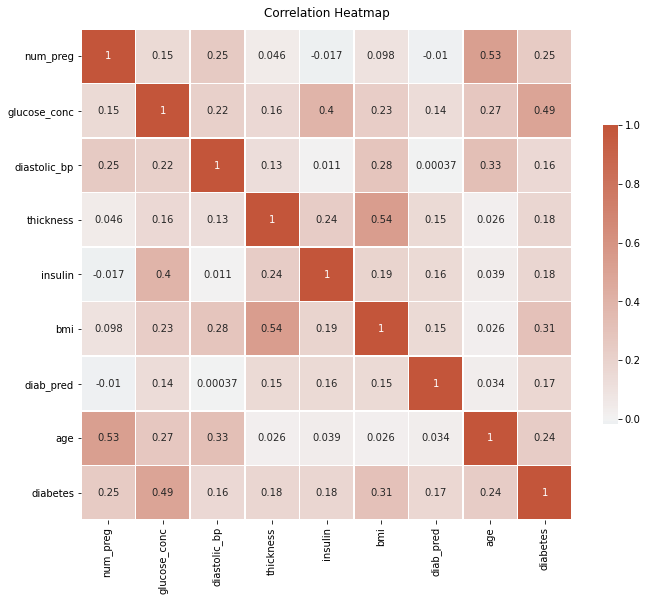

In [17]:
size = 11
fig, ax = plt.subplots(figsize=(size, size))
corr = df.corr()    # data frame correlation function
cmap = sns.diverging_palette(230, 20, as_cmap=True)
heatmap = sns.heatmap(corr, center=0,cmap=cmap, annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

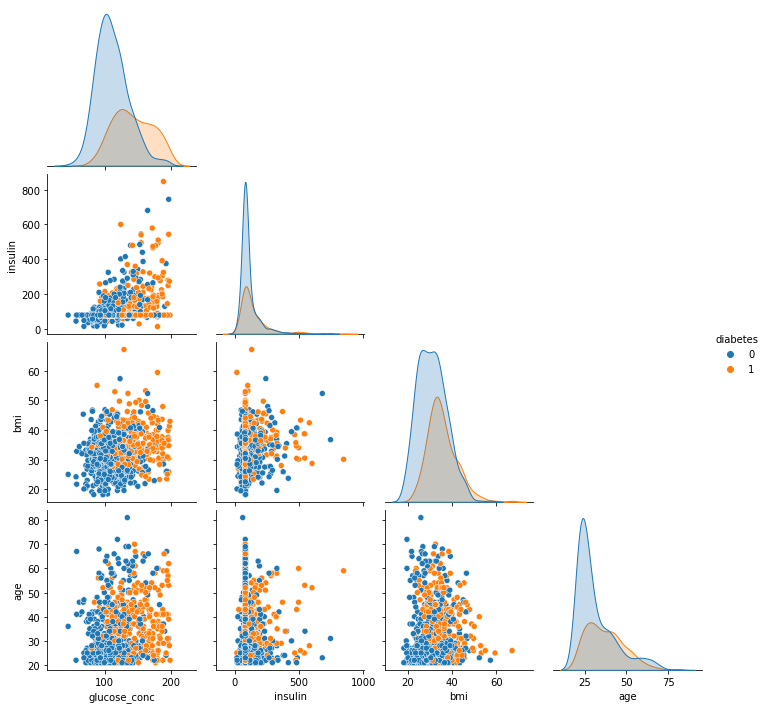

In [18]:
sns.pairplot(df,hue='diabetes',vars=["glucose_conc", 'insulin', 'bmi' , 'age'],corner = True)

### Check class distribution 

Rare events are hard to predict

In [19]:
num_obs = len(df)
num_true = len(df.loc[df['diabetes'] == 1])
num_false = len(df.loc[df['diabetes'] == 0])
print("Number of True cases:  {0} ({1:2.2f}%)".format(num_true, (num_true/num_obs) * 100))
print("Number of False cases: {0} ({1:2.2f}%)".format(num_false, (num_false/num_obs) * 100))

Number of True cases:  268 (34.90%)
Number of False cases: 500 (65.10%)


C:\Users\hamid\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


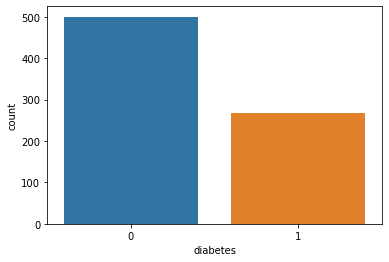

In [20]:
sns.countplot(df['diabetes'] )

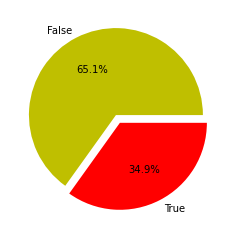

In [21]:
fig, ax = plt.subplots(1,1)

ax.pie(df['diabetes'].value_counts(),explode=(0,0.1), autopct='%1.1f%%', labels = ['False', 'True'], colors=['y','r'])
plt.axis = 'equal'

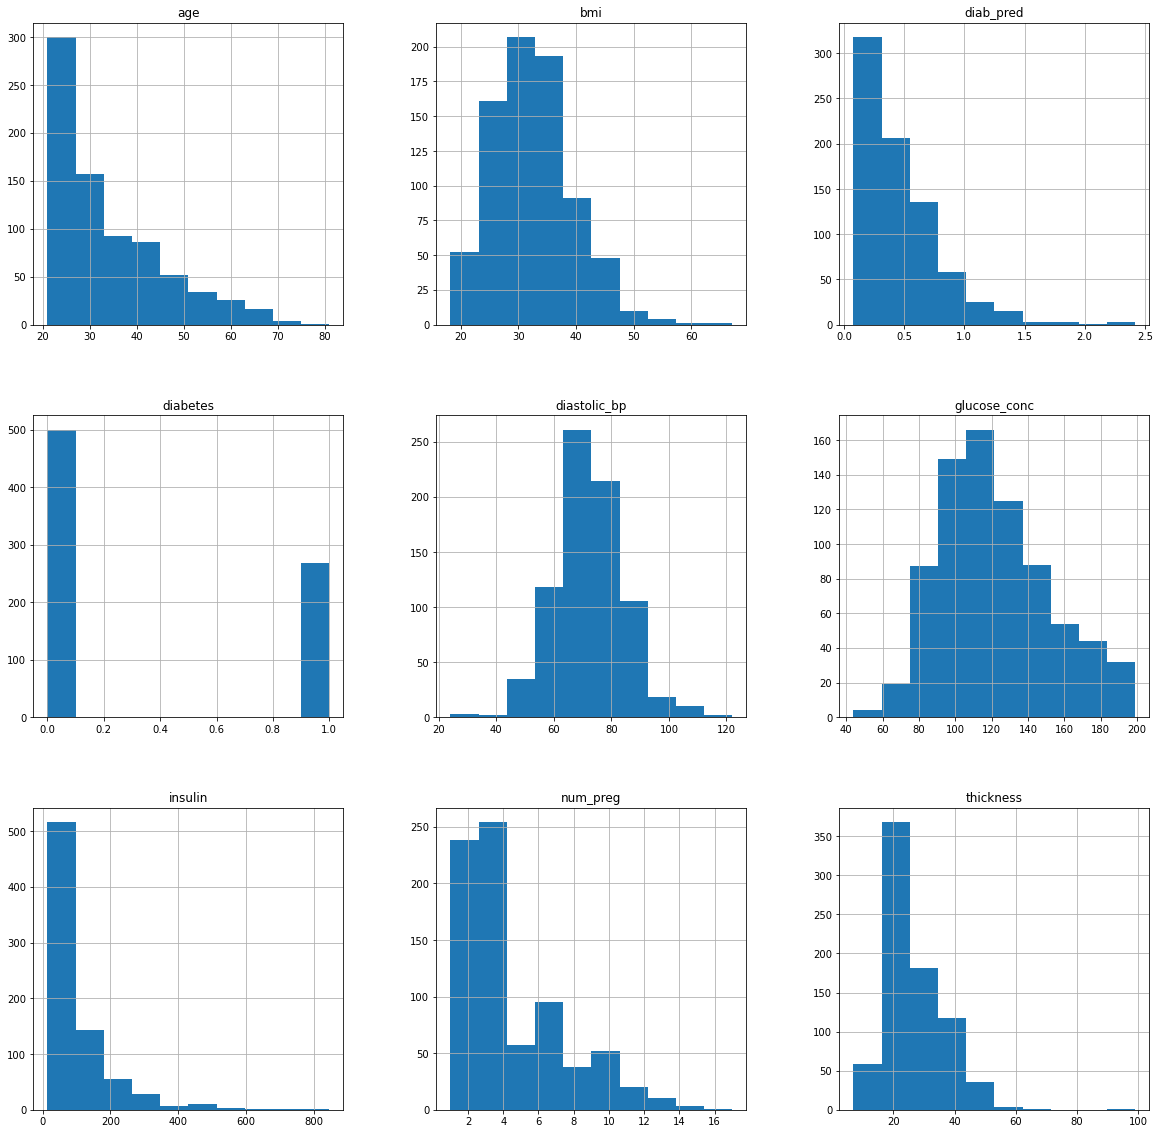

In [22]:
df.hist(figsize = (20, 20))
plt.show()

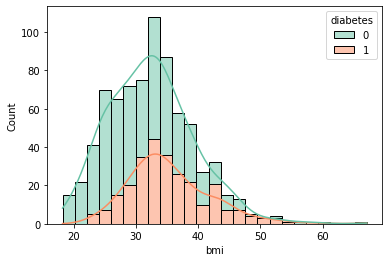

In [23]:
#dir(sns)
sns.histplot(data = df,kde=True, x="bmi" , hue=df["diabetes"], multiple="stack",  palette="Set2" )

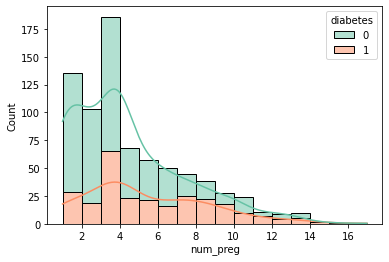

In [24]:
sns.histplot(data = df, kde=True, x="num_preg" , hue=df["diabetes"], multiple="stack",  palette="Set2", binwidth = 1 )

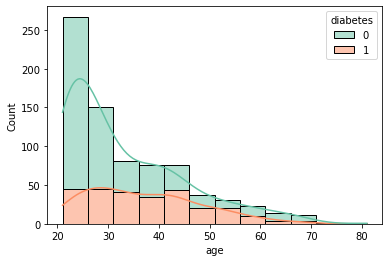

In [25]:
sns.histplot(data = df, kde=True, x="age" , hue=df["diabetes"], multiple="stack",  palette="Set2", binwidth = 5)

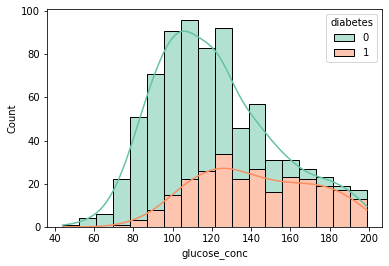

In [26]:
sns.histplot(data = df, kde=True, x="glucose_conc" , hue=df["diabetes"], multiple="stack" , palette="Set2" )

[Text(0, 0.5, 'age')]

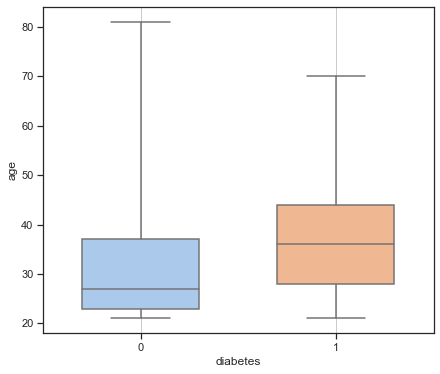

In [27]:
sns.set_theme(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(7, 6))

# Plot the orbital period with horizontal boxes
sns.boxplot(data=df, y="age", x="diabetes",
            whis=[0, 100], width=.6, palette="pastel")

# Add in points to show each observation
#sns.stripplot(x="diabetes", y="age", data=df, size=4, color=".3", linewidth=0)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="age")


[Text(0, 0.5, 'glucose')]

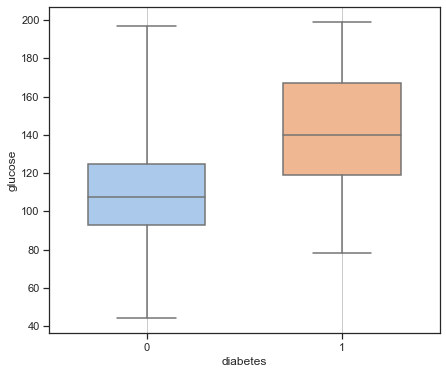

In [28]:
sns.set_theme(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(7, 6))

# Plot the orbital period with horizontal boxes
sns.boxplot(data=df, y="glucose_conc", x="diabetes",
            whis=[0, 100], width=.6, palette="pastel")

# Add in points to show each observation
#sns.stripplot(x="diabetes", y="age", data=df, size=4, color=".3", linewidth=0)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="glucose")


[Text(0, 0.5, 'Number of pregnancies')]

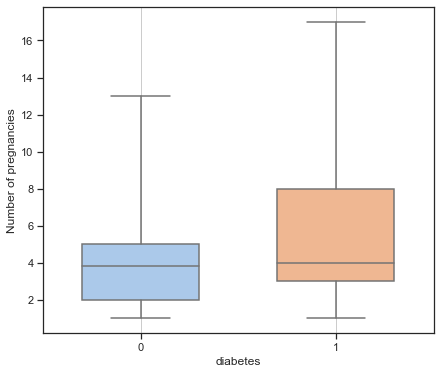

In [29]:
sns.set_theme(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(7, 6))

# Plot the orbital period with horizontal boxes
sns.boxplot(data=df, y="num_preg", x="diabetes",
            whis=[0, 100], width=.6, palette="pastel")

# Add in points to show each observation
#sns.stripplot(x="diabetes", y="age", data=df, size=4, color=".3", linewidth=0)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="Number of pregnancies")

### Spliting the data 

70% for training, 30% for testing

In [30]:
feature_col_names = ['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin', 'bmi', 'diab_pred', 'age']
predicted_class_names = ['diabetes']
X = df[feature_col_names].values     # predictor feature columns (8 X m) 
y = df[predicted_class_names].values # predicted class (1=true, 0=false) column (1 X m)
split_test_size = 0.30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_test_size, random_state = 42) 
                            # test_size = 0.3 is 30%, 42 is the answer to everything

We check to ensure we have the the desired 70% train, 30% test split of the data

In [31]:
print("{0:0.2f}% in training set".format((len(X_train)/len(df.index)) * 100))
print("{0:0.2f}% in test set".format((len(X_test)/len(df.index)) * 100))

69.92% in training set
30.08% in test set


#### Verifying predicted value was split correctly

In [32]:
print("Original True  : {0} ({1:0.2f}%)".format(len(df.loc[df['diabetes'] == 1]), (len(df.loc[df['diabetes'] == 1])/len(df.index)) * 100.0))
print("Original False : {0} ({1:0.2f}%)".format(len(df.loc[df['diabetes'] == 0]), (len(df.loc[df['diabetes'] == 0])/len(df.index)) * 100.0))
print("")
print("Training True  : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train) * 100.0)))
print("Training False : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train) * 100.0)))
print("")
print("Test True      : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test) * 100.0)))
print("Test False     : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test) * 100.0)))


Original True  : 268 (34.90%)
Original False : 500 (65.10%)

Training True  : 188 (35.01%)
Training False : 349 (64.99%)

Test True      : 80 (34.63%)
Test False     : 151 (65.37%)


### Post-split Data Preparation

#### Hidden Missing Values

In [33]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6.000000,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1.000000,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8.000000,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1.000000,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,3.845052,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


## Training Initial Algorithm - Naive Bayes

In [34]:
# create Gaussian Naive Bayes model object and train it with the data
nb_model = GaussianNB()

nb_model.fit(X_train, y_train.ravel())

GaussianNB()

### Performance on Training Data

In [35]:
# predict values using the training data
nb_predict_train = nb_model.predict(X_train)

# Accuracy
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, nb_predict_train)))
print()

Accuracy: 0.7579



### Performance on Testing Data

In [36]:
# predict values using the testing data
nb_predict_test = nb_model.predict(X_test)

# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, nb_predict_test)))


Accuracy: 0.7403


#### Metrics

In [37]:
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test, nb_predict_test)))
print("")

print("precision = {0:0.2f}".format(metrics.precision_score(y_test, nb_predict_test)))
print("recall = {0:0.2f}".format(metrics.recall_score(y_test, nb_predict_test)))


Confusion Matrix
[[120  31]
 [ 29  51]]

precision = 0.62
recall = 0.64


## Random Forest

In [38]:
rf_model = RandomForestClassifier(random_state=42, n_estimators=10)      # Create random forest object
rf_model.fit(X_train, y_train.ravel()) 

RandomForestClassifier(n_estimators=10, random_state=42)

### Predict Training Data

In [39]:
rf_predict_train = rf_model.predict(X_train)
# training metrics
print("Accuracy: {0:.4f} ".format(metrics.accuracy_score(y_train, rf_predict_train)))

Accuracy: 0.9926 


### Predict Test Data

In [40]:
rf_predict_test = rf_model.predict(X_test)

# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, rf_predict_test)))

Accuracy: 0.7403


In [41]:
print(metrics.confusion_matrix(y_test, rf_predict_test) )
print("")

print("precision = {0:0.2f}".format(metrics.precision_score(y_test, rf_predict_test)))
print("recall = {0:0.2f}".format(metrics.recall_score(y_test, rf_predict_test)))


[[121  30]
 [ 30  50]]

precision = 0.62
recall = 0.62


## Logistic Regression

In [42]:
lr_model =LogisticRegression(C=0.7, solver='liblinear', random_state=42)
lr_model.fit(X_train, y_train.ravel())
lr_predict_test = lr_model.predict(X_test)

# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, lr_predict_test)))
print(metrics.confusion_matrix(y_test, lr_predict_test) )
print("")
print("precision = {0:0.2f}".format(metrics.precision_score(y_test, lr_predict_test)))
print("recall = {0:0.2f}".format(metrics.recall_score(y_test, lr_predict_test)))


Accuracy: 0.7446
[[128  23]
 [ 36  44]]

precision = 0.66
recall = 0.55


### Logisitic regression with class_weight='balanced'

In [43]:
lr_model =LogisticRegression(class_weight="balanced", C=0.7, solver='liblinear', random_state=42)
lr_model.fit(X_train, y_train.ravel())
lr_predict_test = lr_model.predict(X_test)

# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, lr_predict_test)))
print(metrics.confusion_matrix(y_test, lr_predict_test) )
print("")
print("precision = {0:0.2f}".format(metrics.precision_score(y_test, lr_predict_test)))
print("recall = {0:0.2f}".format(metrics.recall_score(y_test, lr_predict_test)))


Accuracy: 0.6970
[[102  49]
 [ 21  59]]

precision = 0.55
recall = 0.74


### LogisticRegressionCV

In [44]:
lr_cv_model = LogisticRegressionCV(n_jobs=-1, solver='liblinear', random_state=42, Cs=3, cv=10, refit=True, class_weight="balanced")  # set number of jobs to -1 which uses all cores to parallelize
lr_cv_model.fit(X_train, y_train.ravel())

LogisticRegressionCV(Cs=3, class_weight='balanced', cv=10, n_jobs=-1,
                     random_state=42, solver='liblinear')

### Predict on Test data

In [45]:
lr_cv_predict_test = lr_cv_model.predict(X_test)

# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, lr_cv_predict_test)))
print(metrics.confusion_matrix(y_test, lr_cv_predict_test) )
print("")

print("precision = {0:0.2f}".format(metrics.precision_score(y_test, lr_cv_predict_test)))
print("recall = {0:0.2f}".format(metrics.recall_score(y_test, lr_cv_predict_test)))

Accuracy: 0.6926
[[108  43]
 [ 28  52]]

precision = 0.55
recall = 0.65
